In [1]:
from keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np
import random, os

# Instantiate plotting tool
%matplotlib inline

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN Mixed dnn version. The header is from one version, but we link with a different version (6021, 5103))


In [2]:
def plots(ims, figsize=(12,6), rows=2, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [3]:
data_dir = '/home/ubuntu/fastai-data/pokemon_img'
result_path = os.path.join(data_dir, 'results')

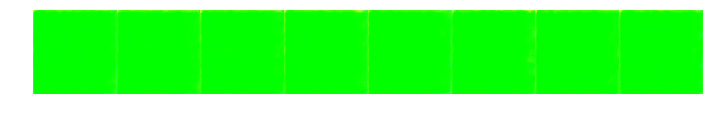

In [49]:
plots([image.load_img(
    os.path.join(result_path,
                 'epoch_10.png'))])

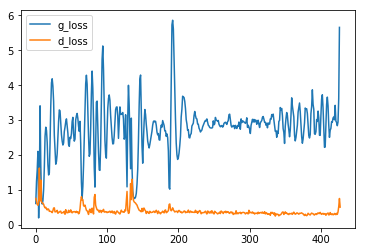

In [52]:
g_loss = np.loadtxt(os.path.join(result_path, 'gan_g_loss_history.csv'))
d_loss = np.loadtxt(os.path.join(result_path, 'gan_d_loss_history.csv'))
plt.plot([x for x in range(len(g_loss))], g_loss, label="g_loss")
plt.plot([x for x in range(len(d_loss))], d_loss, label="d_loss")
plt.legend()
plt.show()